# 7 Decision/Regression-Trees

Follow the notebook to understand the implementation of decision and regression trees using skLearn libraries and functions followed by a visualization of their associated graphs and analysis of their accuracy.

First, we need to setup the dependencies and import the dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# The artificial data will be taken from sklearn
from sklearn.datasets import load_wine

wines = load_wine(as_frame=True)

## Pre-Processing

Before implementing the Decision Trees, we want to examine the dataframe input and whether any pre-processing needs to occur. Here we are using SkLearn's wine dataframe to see how it contrasts the external one used in past notebooks.

The dataset has dimensions of 178 rows x 13 columns. This is a highly condensed alternative to the external dataset previously used

In [2]:
wines.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


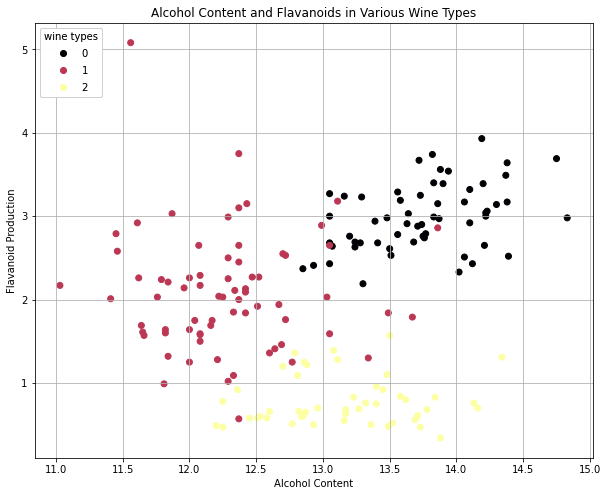

In [3]:
#plot the inputs
fig, ax = plt.subplots(figsize=(10, 8))

a = wines.data.alcohol
b = wines.data.flavanoids
scatter = ax.scatter(a, b, c=wines.target, cmap='inferno')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="wine types")
ax.add_artist(legend1)
ax.set_xlabel("Alcohol Content", fontsize = 10)
ax.set_ylabel("Flavanoid Production", fontsize = 10)
ax.set_title('Alcohol Content and Flavanoids in Various Wine Types')
ax.grid(True)

plt.show()

## Implementation to Train and Test

Use skLearn's train, test, split function to section the input data with training using 80% of the data and testing using 20% of the data

In [14]:
#for training and testing
X = wines.data[['alcohol', 'flavanoids']]
y = wines.target

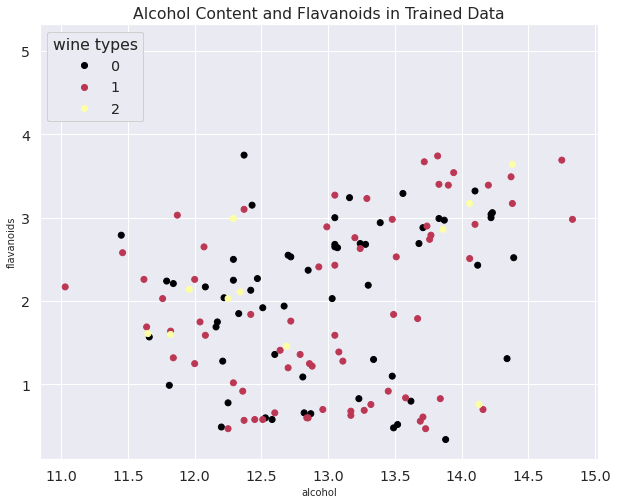

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), 
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 42)

#specify the colors of both the train and test sets
c_train = wines.target[:len(X_train)]
c_test = wines.target[:len(X_test)]

#plot the trained data
fig, ax = plt.subplots(figsize=(10, 8))

a = wines.data.alcohol
b = wines.data.flavanoids
scatter = ax.scatter(X_train[:,0], X_train[:,1], c=c_train, cmap='inferno')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="wine types")
ax.add_artist(legend1)
ax.set_xlabel(wines.data.alcohol.name, fontsize = 10)
ax.set_ylabel(wines.data.flavanoids.name, fontsize = 10)
ax.set_title('Alcohol Content and Flavanoids in Trained Data')
ax.grid(True)

plt.show()

In [16]:
#create the decision tree using skLearn
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- flavanoids <= 1.40
|   |--- alcohol <= 12.41
|   |   |--- flavanoids <= 0.96
|   |   |   |--- alcohol <= 12.36
|   |   |   |   |--- class: 2
|   |   |   |--- alcohol >  12.36
|   |   |   |   |--- class: 1
|   |   |--- flavanoids >  0.96
|   |   |   |--- class: 1
|   |--- alcohol >  12.41
|   |   |--- flavanoids <= 1.29
|   |   |   |--- class: 2
|   |   |--- flavanoids >  1.29
|   |   |   |--- alcohol <= 12.70
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  12.70
|   |   |   |   |--- flavanoids <= 1.30
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- flavanoids >  1.30
|   |   |   |   |   |--- class: 2
|--- flavanoids >  1.40
|   |--- alcohol <= 12.79
|   |   |--- class: 1
|   |--- alcohol >  12.79
|   |   |--- flavanoids <= 2.11
|   |   |   |--- class: 1
|   |   |--- flavanoids >  2.11
|   |   |   |--- alcohol <= 13.06
|   |   |   |   |--- flavanoids <= 2.54
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- flavanoids >  2.54
|   |   |   |   |   |--- flavanoid

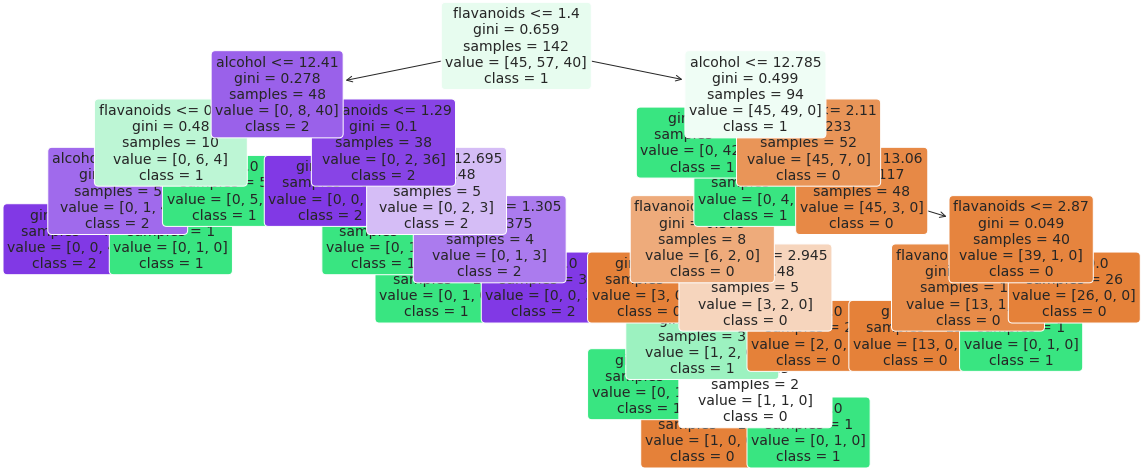

In [17]:
#plot the tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text

class_num = ""

for digit in np.unique(c_train.values):
    class_num += str(digit)

df_names = [wines.data.alcohol.name,wines.data.flavanoids.name]
tree_rules = export_text(decision_tree,
                         feature_names = df_names)

print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = df_names,
                   class_names = class_num,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

Here we can see the decision tree of the different types of wine based on their alcohol content and flavanoids. The first test is whether the flavanoids are less than 1.4. From there, the test is whether the alcohol content is greater or less than 12.41 and so on until the data is classified into a cohesive tree

Below you can see the distribution of the inputs in decision regions

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


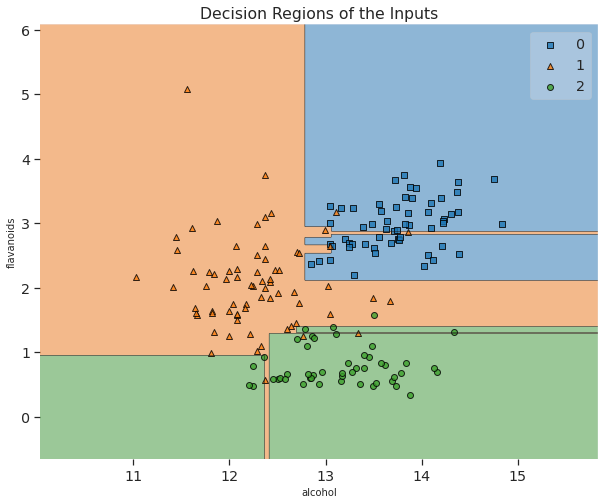

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(np.array(X), np.array(y), clf = decision_tree)
plt.xlabel(wines.data.alcohol.name, fontsize = 10)
plt.ylabel(wines.data.flavanoids.name, fontsize = 10)
plt.title('Decision Regions of the Inputs')
plt.grid()
plt.show()

## Accuracy Testing 

Using skLearn's metrics, we want to implement a confusion matrix with a heatmap to see the accuracy of the true and predicted labels.

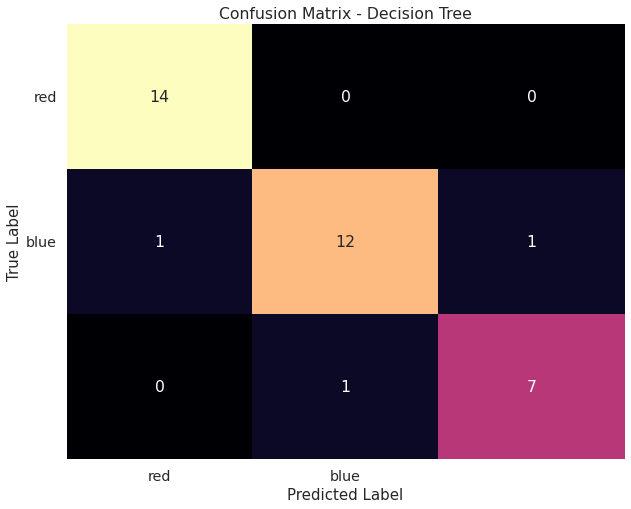

In [19]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(np.unique(wines.target))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(np.unique(wines.target), rotation=0)
plt.show()

We can see that the predicted and true labels are very accurate for the model.

Below, using skLearn's classification report, we can output a roster of scores for the accuracy of the model

In [21]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"MSE decision tree: {mean_squared_error(y_test, y_pred)} \n")

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.86      0.89        14
           2       0.88      0.88      0.88         8

    accuracy                           0.92        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36

MSE decision tree: 0.08333333333333333 



## Regression Trees

Since we have tried skLearn's Decision trees, we want to test the accuracy of the regressor as well:

In [11]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=12)
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

### Accuracy

We can see that the regressor model becomes more accurate as the depth increases, yet it is still not as accurate as the decision tree MSE

In [12]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state=12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")

reg2 = DecisionTreeRegressor(max_depth=16, random_state=12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")


MSE reg1: 0.26890770839800826 

MSE reg2: 0.1111111111111111 

